In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_excel('train.xlsx')
display(train.head())
print(train.info())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,546,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.0000,NaN,S
1,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
2,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
3,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
4,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


The *Cabin* column is only 23% filled, so I will not be using this column for data analysis.
Note that *Age* column is also missing data with only 80% filled, but we will still use this column

In [4]:
#remove Cabin column
train_clean = train.drop(columns = ['Cabin'])
display(train_clean)
print(train_clean.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,546,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.0000,S
1,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,S
2,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,S
3,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,S
4,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,S
887,527,1,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.5000,S
888,220,0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.5000,S
889,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


In [5]:
# just curious to see if Passenger Class ticket has any correlation to the documentation of age
no_age = train_clean[train_clean['Age'].isna()]
print(f'Percentage of first class no age: {(no_age["Pclass"][no_age["Pclass"] == 1].count() / no_age.shape[0]).round(2)}%')
print(f'Percentage of second class no age: {(no_age["Pclass"][no_age["Pclass"] == 2].count() / no_age.shape[0]).round(2)}%')
print(f'Percentage of thrid class no age: {(no_age["Pclass"][no_age["Pclass"] == 3].count() / no_age.shape[0]).round(2)}% \n')

has_age = train_clean[train_clean['Age'].notna()]
print(f'Percentage of first class has age: {(has_age["Pclass"][has_age["Pclass"] == 1].count() / has_age.shape[0]).round(2)}%')
print(f'Percentage of second class has age: {(has_age["Pclass"][has_age["Pclass"] == 2].count() / has_age.shape[0]).round(2)}%')
print(f'Percentage of third class has age: {(has_age["Pclass"][has_age["Pclass"] == 3].count() / has_age.shape[0]).round(2)}%')

Percentage of first class no age: 0.17%
Percentage of second class no age: 0.06%
Percentage of thrid class no age: 0.77% 

Percentage of first class has age: 0.26%
Percentage of second class has age: 0.24%
Percentage of third class has age: 0.5%


Upon a quick glance, we see that passengers that do not have their age documented belonged to lower class seats. This may be a reflection of how society may have treated the importance of personal information depending on their hierchachy

In [6]:
# separate data into two dataframes: passengers that survived and passengers that died
survived = train_clean[train_clean['Survived'] == 1]
died = train_clean[train_clean['Survived'] == 0]

print(survived.info())
print(died.info())


<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 1 to 889
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  342 non-null    int64  
 1   Survived     342 non-null    int64  
 2   Pclass       342 non-null    int64  
 3   Name         342 non-null    object 
 4   Sex          342 non-null    object 
 5   Age          290 non-null    float64
 6   SibSp        342 non-null    int64  
 7   Parch        342 non-null    int64  
 8   Ticket       342 non-null    object 
 9   Fare         342 non-null    float64
 10  Embarked     340 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 32.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 549 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  549 non-null    int64  
 1   Survived     549 non-null    int64  
 2   Pclass       

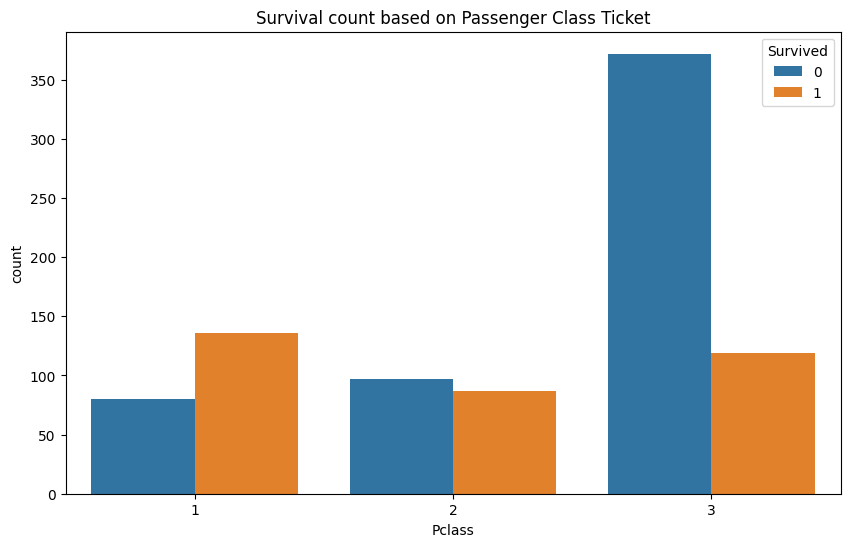

In [7]:
# lets take a look at the correlation between passenger class with survivability
plt.figure(figsize=(10, 6))
sns.countplot(data = train_clean, x='Pclass', hue='Survived')
plt.title('Survival count based on Passenger Class Ticket')
plt.show()

Looks like passengers that bought third class ticket are more likely to die, and first class passengers are slightly likely to survive

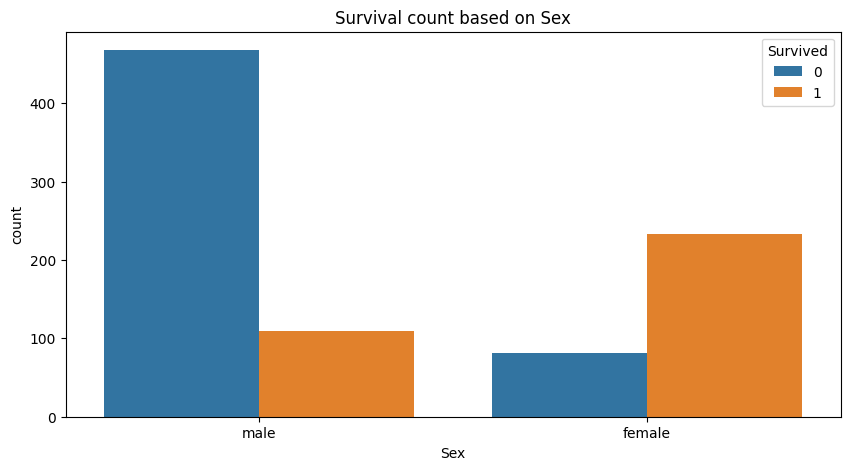

In [8]:
# lets see how age correlates to survivability
plt.figure(figsize=(10, 5))
sns.countplot(data=train_clean, x='Sex', hue='Survived')
plt.title('Survival count based on Sex')
plt.show()

Based on the data males are more likely to die and females are more likely to die

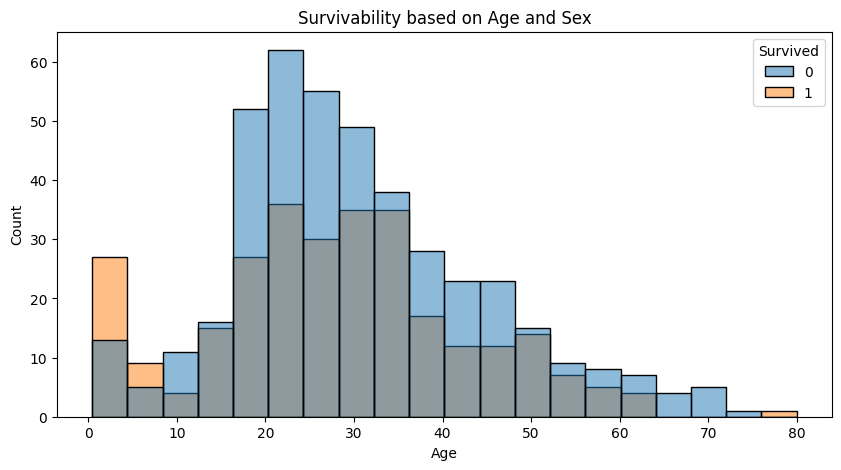

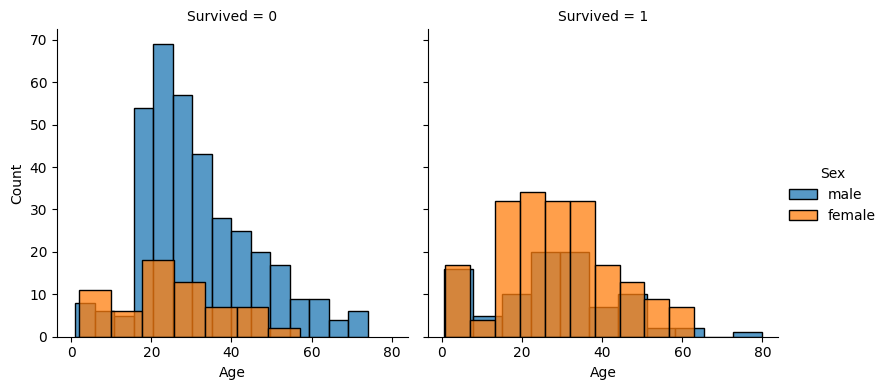

In [9]:
# Lets take a look at how Age plays a role in survivability
plt.figure(figsize=(10,5))
sns.histplot(data=train_clean, x='Age', hue='Survived')
plt.title('Survivability based on Age and Sex')
plt.show()

# lets take a look from those who survived and died how much were male and female
g = sns.FacetGrid(data=train_clean, col='Survived', col_wrap=2, height=4, hue='Sex')
g.map(sns.histplot, 'Age', element='bars')
g.add_legend()
plt.show()



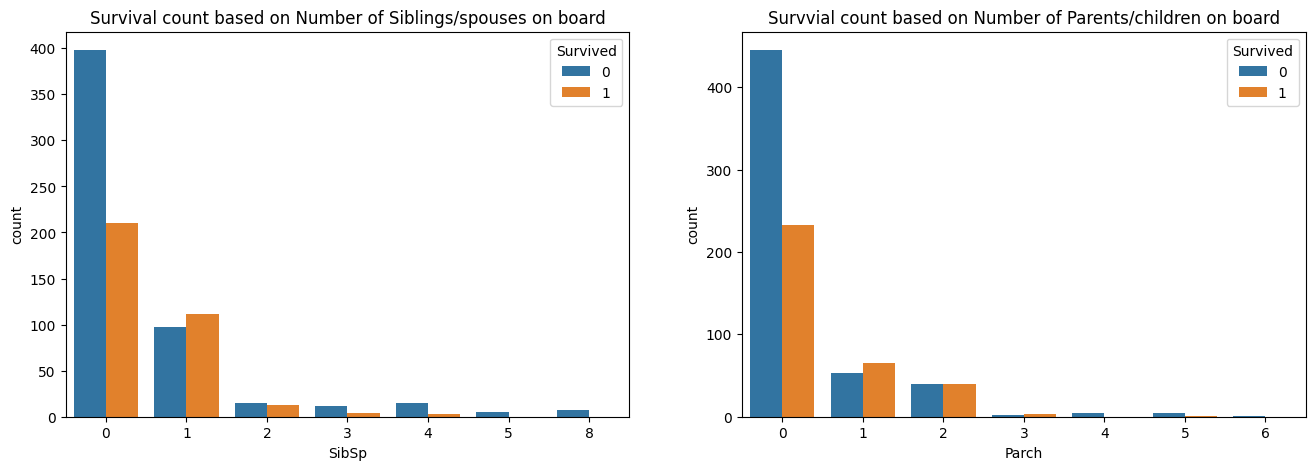

c:\Users\betha\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


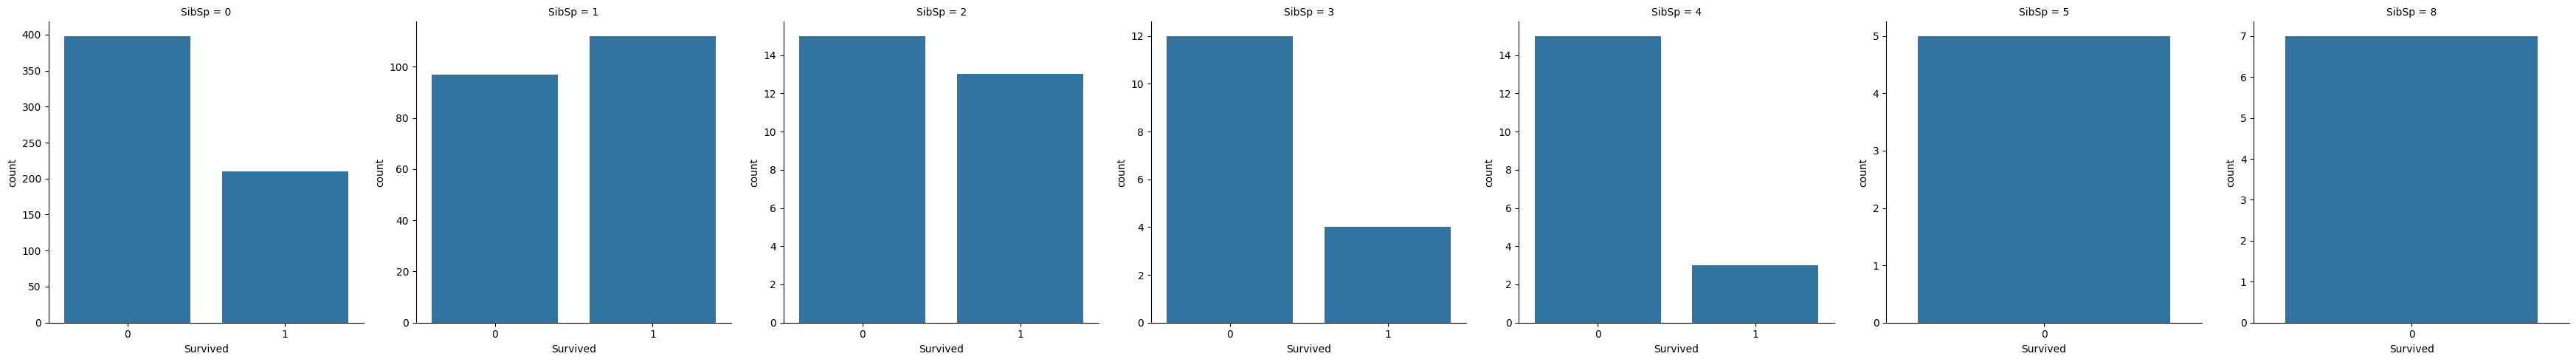

c:\Users\betha\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


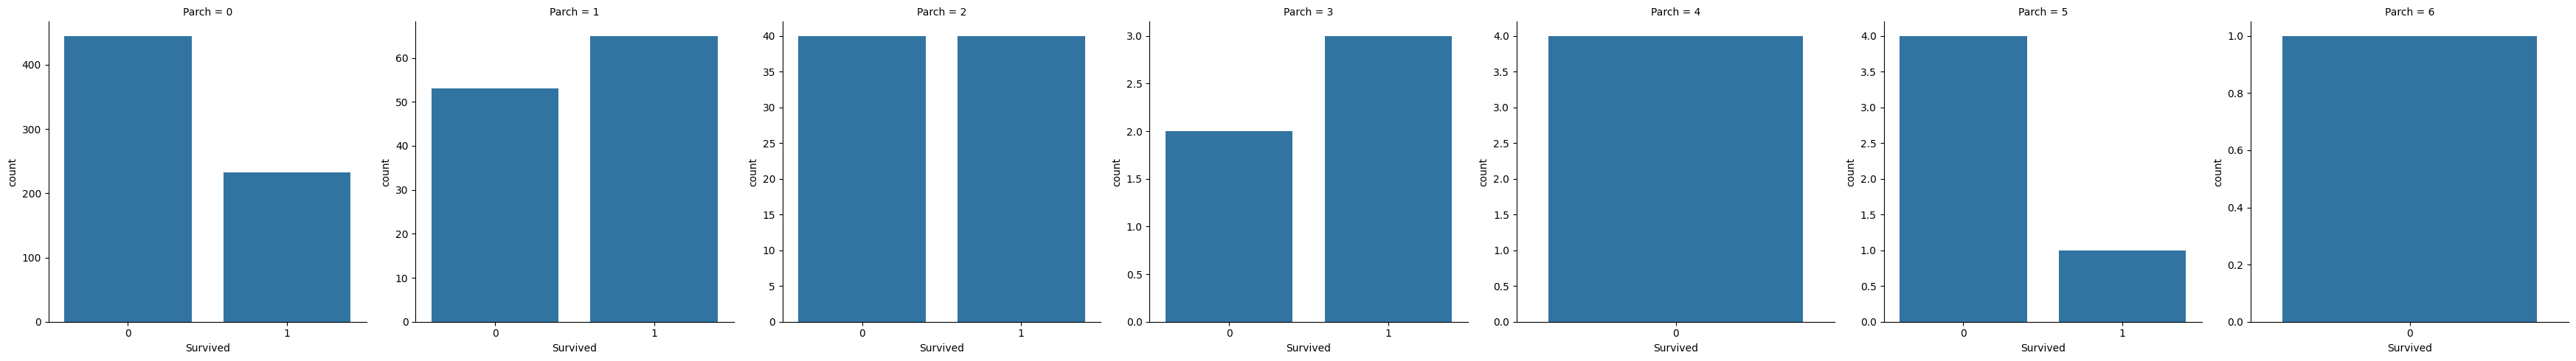

In [10]:
# lets take a look at how number of siblings and parents affect survivability 
fig, axes = plt.subplots(1, 2, figsize=(16,5))

sns.countplot(data=train_clean, x='SibSp', hue='Survived', ax=axes[0])
axes[0].set_title('Survival count based on Number of Siblings/spouses on board')
sns.countplot(data=train_clean, x='Parch', hue='Survived', ax=axes[1])
axes[1].set_title('Survvial count based on Number of Parents/children on board')
plt.show()

s = sns.FacetGrid(data=train_clean, col="SibSp", col_wrap=8, height=5, sharey=False, sharex=False)
s.map(sns.countplot, 'Survived')
plt.show()

p = sns.FacetGrid(data=train_clean, col="Parch", col_wrap=8, height=5, sharey=False, sharex=False)
p.map(sns.countplot, 'Survived')
plt.show()


There is a high correlation between having 0 siblings/spouse and 0 parents and children to high survivability. Perhaps this is due to more effort an individual can put when it is concentrated on themselves. Passengers that have family will be thinking of their wellbeing and so efforts to surviving will be divided which shows to not be optimum according to the data

In [96]:
# Lets explore the relation between Ticket and survivability
print(train_clean.duplicated(subset='Ticket', keep=False).sum())
print(train_clean.shape[0])
# pd.set_option('display.max_columns', None)
repeat_tickets = train_clean[train_clean.duplicated(subset='Ticket', keep=False)]
repeat_tickets = repeat_tickets.sort_values(by='Ticket', ascending=True, key=lambda col: col.astype(str))
display(repeat_tickets)


344
891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,New Fare
318,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.500,S,28.833333
315,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.500,S,28.833333
316,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.500,S,28.833333
322,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.650,S,39.825000
171,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.650,S,79.650000
...,...,...,...,...,...,...,...,...,...,...,...,...
882,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,S,8.593750
883,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.375,S,8.593750
884,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.375,S,8.593750
889,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.000,S,71.000000


In [97]:
ticket = repeat_tickets["Ticket"].values
fare = repeat_tickets["Fare"].values
n = repeat_tickets.shape[0] - 1
train_clean['New Fare'] = train_clean['Fare']


i = 0
while i < n:
    repeat_count = 1

    # get number of repeats
    while ticket[i] == ticket[i+repeat_count] and i + repeat_count < n:
        repeat_count += 1

    # if there are repeats, divide repeated values by number of repeats
    if repeat_count > 1:
        new_fare = fare[i] / repeat_count
        train_clean['New Fare'][repeat_tickets.index[i:i+repeat_count]] = new_fare
    
    i += repeat_count

display(train_clean)

C:\Users\betha\AppData\Local\Temp\ipykernel_3804\1521550063.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_clean['New Fare'][repeat_tickets.index[i:i+repeat_count]] = new_fare
C:\Users\betha\AppData\Local\Temp\ipykernel_3804\1521

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,New Fare
0,546,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.0000,S,26.000000
1,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,S,8.070829
2,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,S,8.070829
3,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,S,8.070829
4,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,S,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
886,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,S,61.175000
887,527,1,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.5000,S,10.500000
888,220,0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.5000,S,10.500000
889,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,S,71.000000


ticket numbers are unique, but looks like there are multiple duplicates which means that tickets numbers can be group tickets. Upon closer look repeated ticket numbers are shared across family members (same family name) or friends (often sharing last names are of similar race). Ticket does not have any correlation with survivability. I have no better method to analysis it correlation to survivability at this moment and will revisit this at a later date to see if there is a better way. For now, Ticket number will not be used as a features in our model.

In [94]:
train_clean[train_clean['Ticket']=='PC 17755']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,New Fare
788,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,512.3292
796,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,256.1646
797,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,256.1646


<Axes: xlabel='New Fare', ylabel='Count'>

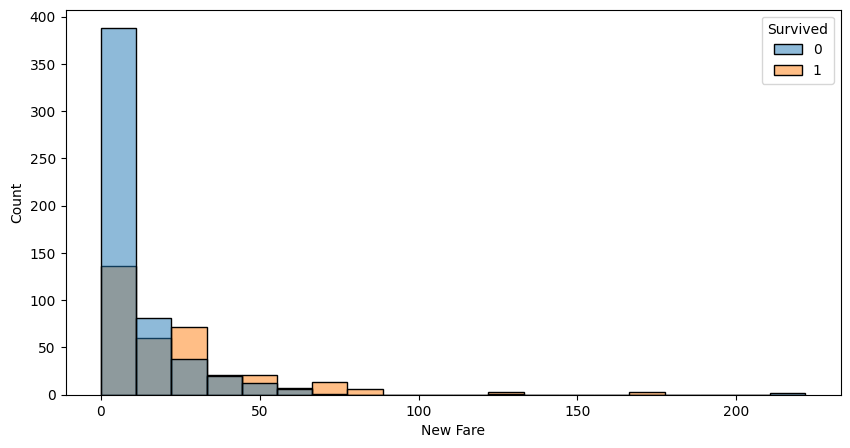

In [98]:
# lets explore if there are any correlation between fare and survivability
plt.figure(figsize=(10,5))
sns.histplot(data=train_clean, x='New Fare', bins=20, hue="Survived")

<Axes: xlabel='Pclass', ylabel='Fare'>

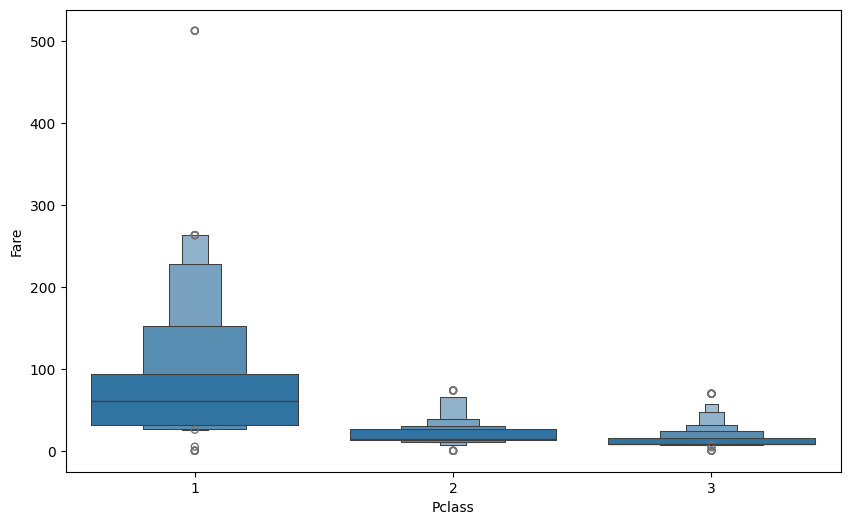

In [13]:
plt.figure(figsize=(10,6))
sns.boxenplot(data=train_clean, x='Pclass', y='Fare')